# Лабораторная работа №6 по курсу "Численные методы"

Выполнил студент группы М8О-408Б-20 Меджидли Махмуд.

Преподаватель: Пивоваров Д.Е.

### **Задание:**
Используя явную схему крест и неявную схему, решить начально-краевую
задачу для дифференциального уравнения гиперболического типа. Аппроксимацию
второго начального условия произвести с первым и со вторым порядком. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих
производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком*. В различные моменты времени вычислить погрешность численного решения
путем сравнения результатов с приведенным в задании аналитическим решением
u(x, t). Исследовать зависимость погрешности от сеточных параметров τ и h.


### **Вариант 6**

***Уравнение:***

$$\displaystyle\frac{\partial^2 u}{\partial t^2} =  \displaystyle\frac{\partial^2 u}{\partial x^2} +2\displaystyle\frac{\partial^2 u}{\partial x^2} - 2u $$

\begin{equation*}
 \begin{cases}
   u_{x}' (0, \: t) = cos(2t)
   \\
   u_{x} (\pi/2, \: t) =  0
   \\
   u(x, \: 0) = \psi_1(x) = e^{-x}cos(x)
   \\
   u_{t}(x, 0) = \psi_2(x) = 0
 \end{cases}
\end{equation*}

***Аналитическое решение:***
$$u(x, t) = e^{-x}\cos{x} \cos{2t}$$

Явная и неявная конечно-разностные схемы представляют собой системы уравнений, краевые решения которых заполняются из начальных данных, а значения в середине заполняются по средству вычисления уравнений с одной или несколькими неизвестными.

$$\displaystyle\frac{u^{k+1}_j - u^k_j}{\tau} = a \displaystyle\frac{u^k_{j-1} - 2 u^k_{j} + u^k_{j+1}}{h^2}, \; \forall j \in \{1, ..., N-1\}, \forall k \in \{0, ..., K-1\}$$

Явная схема:

$$\displaystyle\frac{u^{k+1}_j - u^k_j}{\tau} = a \displaystyle\frac{u^k_{j-1} - 2 u^k_{j} + u^k_{j+1}}{h^2}, \; \forall j \in \{1, ..., N-1\}, \forall k \in \{0, ..., K-1\}$$

Схема Кранка Николсона подразумевает объединение в себе двух предыдущих схем, в следствии чего при подборе необходимого коэффициента, достигается наименьшая погрешность.

Неявная схема:

$$\displaystyle\frac{u^{k+1}_j - u^k_j}{\tau} = \theta a \displaystyle\frac{u^{k+1}_{j-1} - 2 u^{k+1}_{j} + u^{k+1}_{j+1}}{h^2} + (1 - \theta) a \displaystyle\frac{u^k_{j-1} - 2 u^k_{j} + u^k_{j+1}}{h^2}$$

## Апроксимация первого порядка

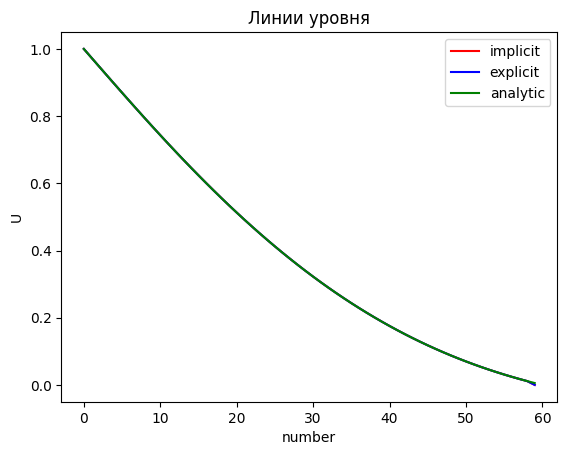

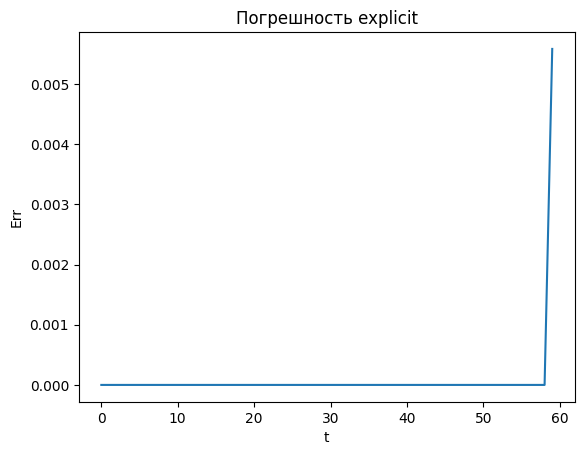

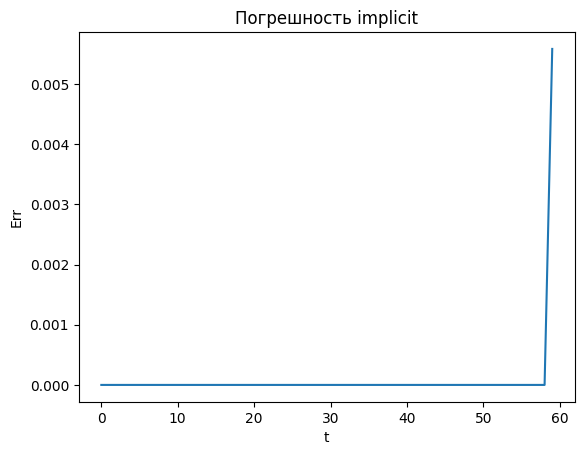

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tma(a, b, c, d):
    size = len(a)
    p, q = [], []
    p.append(-c[0] / b[0])
    q.append(d[0] / b[0])

    for i in range(1, size):
        p_tmp = -c[i] / (b[i] + a[i] * p[i - 1])
        q_tmp = (d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1])
        p.append(p_tmp)
        q.append(q_tmp)

    x = [0 for _ in range(size)]
    x[size - 1] = q[size - 1]

    for i in range(size - 2, -1, -1):
        x[i] = p[i] * x[i + 1] + q[i]

    return x

class Data:
    def __init__(self, args):
        self.a = args['a']
        self.b = args['b']
        self.c = args['c']
        self.d = args['d']
        self.l = args['l']
        self.f = args['f']
        self.alpha = args['alpha']
        self.beta = args['beta']
        self.gamma = args['gamma']
        self.delta = args['delta']
        self.psi1 = args['psi1']
        self.psi2 = args['psi2']
        self.psi1_dir1 = args['psi1_dir1']
        self.psi1_dir2 = args['psi1_dir2']
        self.phi0 = args['phi0']
        self.phi1 = args['phi1']
        self.bound_type = args['bound_type']
        self.approximation = args['approximation']
        self.solution = args['solution']


class HyperbolicSolver:
    def __init__(self, args, N, K, T):
        self.data = Data(args)
        self.h = self.data.l / N
        self.tau = T / K
        self.sigma = (self.tau ** 2) / (self.h ** 2)

    def analyticSolve(self, N, K, T):
        self.h = self.data.l / N
        self.tau = T / K
        self.sigma = (self.tau ** 2) / (self.h ** 2)
        u = np.zeros((K, N))
        for k in range(K):
            for j in range(N):
                u[k][j] = self.data.solution(j * self.h, k * self.tau)
        return u

    def calculate(self, N, K):
        u = np.zeros((K, N))

        for j in range(0, N - 1):
            x = j * self.h
            u[0][j] = self.data.psi1(x)

            if self.data.approximation == 'p1':
                u[1][j] = self.data.psi1(x) + self.data.psi2(x) * self.tau + self.data.psi1_dir2(x) * \
                          (self.tau ** 2 / 2)
            elif self.data.approximation == 'p2':
                u[1][j] = self.data.psi1(x) + self.data.psi2(x) * self.tau + \
                          (self.data.psi1_dir2(x) + self.data.b * self.data.psi1_dir1(x) +
                           self.data.c * self.data.psi1(x) + self.data.f()) * (self.tau ** 2 / 2)

        return u

    def implicit_solver(self, N, K, T):
        u = self.calculate(N, K)

        a = np.zeros(N)
        b = np.zeros(N)
        c = np.zeros(N)
        d = np.zeros(N)

        for k in range(2, K):
            for j in range(1, N):
                a[j] = self.sigma
                b[j] = -(1 + 2 * self.sigma)
                c[j] = self.sigma
                d[j] = -2 * u[k - 1][j] + u[k - 2][j]

            if self.data.bound_type == 'a1p2':
                b[0] = self.data.alpha / self.h / (self.data.beta - self.data.alpha / self.h)
                c[0] = 1
                d[0] = 1 / (self.data.beta - self.data.alpha / self.h) * self.data.phi0(k * self.tau)
                a[-1] = -self.data.gamma / self.h / (self.data.delta + self.data.gamma / self.h)
                d[-1] = 1 / (self.data.delta + self.data.gamma / self.h) * self.data.phi1(k * self.tau)

            elif self.data.bound_type == 'a2p3':
                k1 = 2 * self.h * self.data.beta - 3 * self.data.alpha
                omega = self.tau ** 2 * self.data.b / (2 * self.h)
                xi = self.data.d * self.tau / 2

                b[0] = 4 * self.data.alpha - self.data.alpha / (self.sigma + omega) * \
                       (1 + xi + 2 * self.sigma - self.data.c * self.tau ** 2)
                c[0] = k1 - self.data.alpha * (omega - self.sigma) / (omega + self.sigma)
                d[0] = 2 * self.h * self.data.phi0(k * self.tau) + self.data.alpha * d[1] / (-self.sigma - omega)
                a[-1] = -self.data.gamma / (omega - self.sigma) * \
                        (1 + xi + 2 * self.sigma - self.data.c * self.tau ** 2) - 4 * self.data.gamma
                d[-1] = 2 * self.h * self.data.phi1(k * self.tau) - self.data.gamma * d[-2] / (omega - self.sigma)

            elif self.data.bound_type == 'a2p2':
                b[0] = 2 * self.data.a / self.h
                c[0] = -2 * self.data.a / self.h + self.h / self.tau ** 2 - self.data.c * self.h + \
                       -self.data.d * self.h / (2 * self.tau) + \
                       self.data.beta / self.data.alpha * (2 * self.data.a + self.data.b * self.h)
                d[0] = self.h / self.tau ** 2 * (u[k - 2][0] - 2 * u[k - 1][0]) - self.h * self.data.f() + \
                       -self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + \
                       (2 * self.data.a - self.data.b * self.h) / self.data.alpha * self.data.phi0(k * self.tau)
                a[-1] = -b[0]
                d[-1] = self.h / self.tau ** 2 * (-u[k - 2][0] + 2 * u[k - 1][0]) + self.h * self.data.f() + \
                        self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + \
                        (2 * self.data.a + self.data.b * self.h) / self.data.alpha * self.data.phi1(k * self.tau)

            u[k] = tma(a, b, c, d)

        return u

    def _left_bound_a1p2(self, u, k, t):
        coeff = self.data.alpha / self.h
        return (-coeff * u[k - 1][1] + self.data.phi0(t)) / (self.data.beta - coeff)

    def _right_bound_a1p2(self, u, k, t):
        coeff = self.data.gamma / self.h
        return (coeff * u[k - 1][-2] + self.data.phi1(t)) / (self.data.delta + coeff)

    def _left_bound_a2p2(self, u, k, t):
        n = self.data.c * self.h - 2 * self.data.a / self.h - self.h / self.tau ** 2 - self.data.d * self.h / \
            (2 * self.tau) + self.data.beta / self.data.alpha * (2 * self.data.a - self.data.b * self.h)
        return 1 / n * (- 2 * self.data.a / self.h * u[k][1] +
                        self.h / self.tau ** 2 * (u[k - 2][0] - 2 * u[k - 1][0]) +
                        -self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + -self.h * self.data.f() +
                        (2 * self.data.a - self.data.b * self.h) / self.data.alpha * self.data.phi0(t))

    def _right_bound_a2p2(self, u, k, t):
        n = -self.data.c * self.h + 2 * self.data.a / self.h + self.h / self.tau ** 2 + self.data.d * self.h / \
            (2 * self.tau) + self.data.delta / self.data.gamma * (2 * self.data.a + self.data.b * self.h)
        return 1 / n * (2 * self.data.a / self.h * u[k][-2] +
                        self.h / self.tau ** 2 * (2 * u[k - 1][-1] - u[k - 2][-1]) +
                        self.data.d * self.h / (2 * self.tau) * u[k - 2][-1] + self.h * self.data.f() +
                        (2 * self.data.a + self.data.b * self.h) / self.data.gamma * self.data.phi1(t))

    def _left_bound_a2p3(self, u, k, t):
        denom = 2 * self.h * self.data.beta - 3 * self.data.alpha
        return self.data.alpha / denom * u[k - 1][2] - 4 * self.data.alpha / denom * u[k - 1][1] + \
               2 * self.h / denom * self.data.phi0(t)

    def _right_bound_a2p3(self, u, k, t):
        denom = 2 * self.h * self.data.delta + 3 * self.data.gamma
        return 4 * self.data.gamma / denom * u[k - 1][-2] - self.data.gamma / denom * u[k - 1][-3] + \
               2 * self.h / denom * self.data.phi1(t)

    def explicit_solver(self, N, K, T):
        global left_bound, right_bound
        u = self.calculate(N, K)

        if self.data.bound_type == 'a1p2':
            left_bound = self._left_bound_a1p2
            right_bound = self._right_bound_a1p2

        elif self.data.bound_type == 'a2p2':
            left_bound = self._left_bound_a2p2
            right_bound = self._right_bound_a2p2

        elif self.data.bound_type == 'a2p3':
            left_bound = self._left_bound_a2p3
            right_bound = self._right_bound_a2p3

        for k in range(2, K):
            t = k * self.tau
            for j in range(1, N - 1):
                quadr = self.tau ** 2
                tmp1 = self.sigma + self.data.b * quadr / (2 * self.h)
                tmp2 = self.sigma - self.data.b * quadr / (2 * self.h)
                u[k][j] = u[k - 1][j + 1] * tmp1 + \
                    u[k - 1][j] * (-2 * self.sigma + 2 + self.data.c * quadr) + \
                    u[k - 1][j - 1] * tmp2 - u[k - 2][j] + quadr * self.data.f()
            u[k][0] = left_bound(u, k, t)
            u[k][-1] = right_bound(u, k, t)

        return u


def presontation(dict_, time=0):
    fig = plt.figure()
    plt.title('Линии уровня')
    plt.plot(dict_['implicit'][time], color='r', label='implicit')
    plt.plot(dict_['explicit'][time], color='b', label='explicit')
    plt.plot(dict_['analytic'][time], color='g', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('number')
    plt.show()

    plt.title('Погрешность explicit')
    plt.plot(abs(dict_['explicit'][time] - dict_['analytic'][time]))
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.show()

    plt.title('Погрешность implicit')
    plt.plot(abs(dict_['implicit'][time] - dict_['analytic'][time]))
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.show()


data = {'N': 60, 'K': 100, 'T': 1}
N, K, T = int(data['N']), int(data['K']), int(data['T'])

args = {
    'a': 1,
    'b': 2,
    'c': -2,
    'd': 0,
    'l': np.pi / 2,
    'f': lambda: 0,
    'alpha': 1,
    'beta': 0,
    'gamma': 1,
    'delta': 0,
    'psi1': lambda x: np.exp(-x) * np.cos(x),
    'psi2': lambda x: 0,
    'psi1_dir1': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
    'psi1_dir2': lambda x: 2 * np.exp(-x) * np.sin(x),
    'phi0': lambda t: np.cos(2 * t),
    'phi1': lambda t: 0,
    'bound_type': 'a1p2',
    'approximation': 'p1',
    'solution': lambda x, t: np.exp(-x) * np.cos(x) * np.cos(2 * t),
}

solver = HyperbolicSolver(args, N, K, T)

ans = {
    'implicit': solver.implicit_solver(N, K, T),
    'explicit': solver.explicit_solver(N, K, T),
    'analytic': solver.analyticSolve(N, K, T)
}

presontation(ans)

## Апроксимация 3-х точечная второго порядка

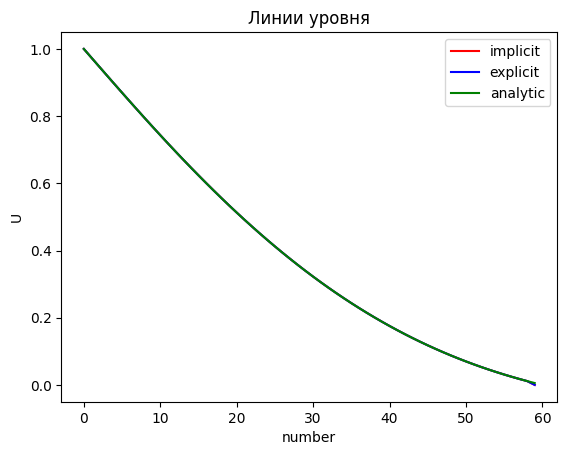

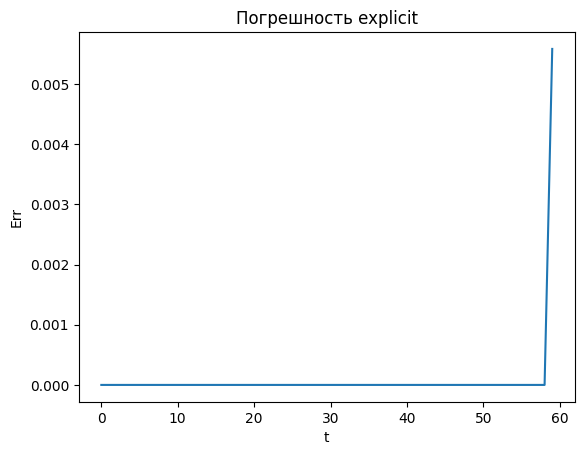

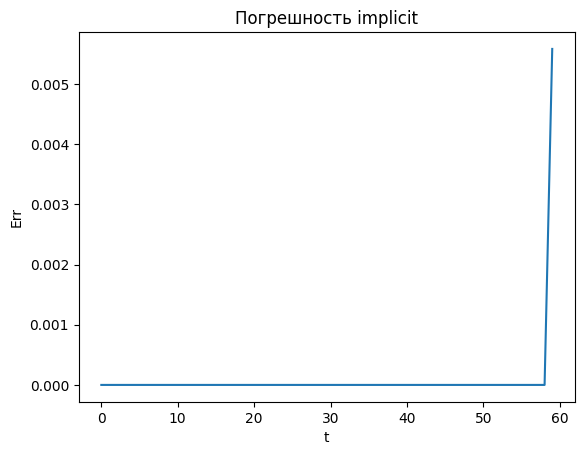

In [ ]:
data = {'N': 60, 'K': 100, 'T': 1}
N, K, T = int(data['N']), int(data['K']), int(data['T'])

args = {
    'a': 1,
    'b': 2,
    'c': -2,
    'd': 0,
    'l': np.pi / 2,
    'f': lambda: 0,
    'alpha': 1,
    'beta': 0,
    'gamma': 1,
    'delta': 0,
    'psi1': lambda x: np.exp(-x) * np.cos(x),
    'psi2': lambda x: 0,
    'psi1_dir1': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
    'psi1_dir2': lambda x: 2 * np.exp(-x) * np.sin(x),
    'phi0': lambda t: np.cos(2 * t),
    'phi1': lambda t: 0,
    'bound_type': 'a2p3',
    'approximation': 'p2',
    'solution': lambda x, t: np.exp(-x) * np.cos(x) * np.cos(2 * t),
}

solver = HyperbolicSolver(args, N, K, T)

ans = {
    'implicit': solver.implicit_solver(N, K, T),
    'explicit': solver.explicit_solver(N, K, T),
    'analytic': solver.analyticSolve(N, K, T)
}

presontation(ans)

В качестве результата я получа графики линий уровня U. Они наиболее наглядно показывают точность методов, и в каких промежутках какой метод будет эффективен, а какой нет. Также я вывожу графики модуля ошибки каждого метода. Исследование зависимости погрешности от параметров находится в одном файле с исходным кодом.

## Апроксимация 2-х точечная второго порядка

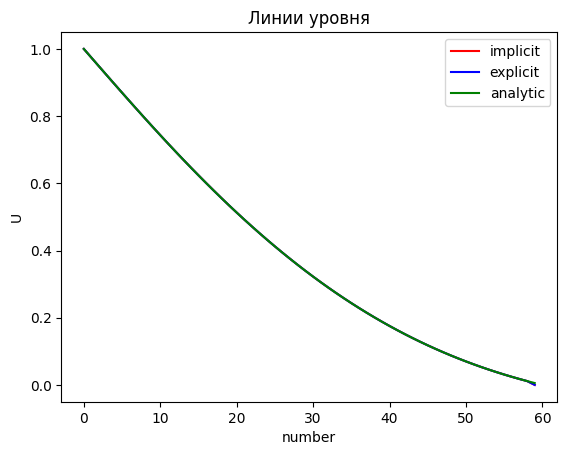

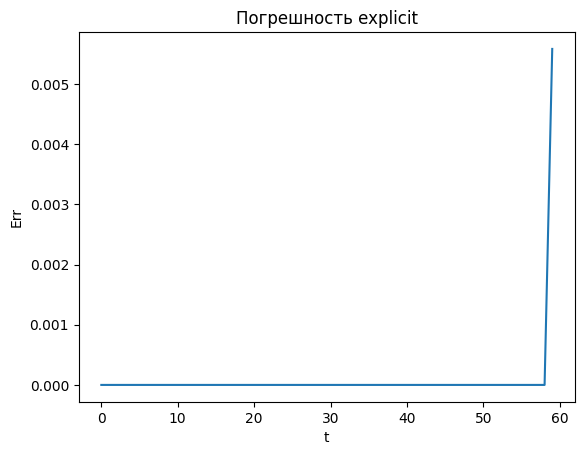

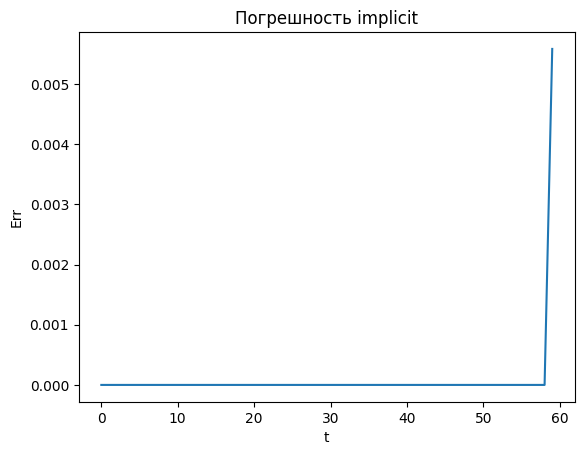

In [ ]:
data = {'N': 60, 'K': 100, 'T': 1}
N, K, T = int(data['N']), int(data['K']), int(data['T'])

args = {
    'a': 1,
    'b': 2,
    'c': -2,
    'd': 0,
    'l': np.pi / 2,
    'f': lambda: 0,
    'alpha': 1,
    'beta': 0,
    'gamma': 1,
    'delta': 0,
    'psi1': lambda x: np.exp(-x) * np.cos(x),
    'psi2': lambda x: 0,
    'psi1_dir1': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
    'psi1_dir2': lambda x: 2 * np.exp(-x) * np.sin(x),
    'phi0': lambda t: np.cos(2 * t),
    'phi1': lambda t: 0,
    'bound_type': 'a1p2',
    'approximation': 'p2',
    'solution': lambda x, t: np.exp(-x) * np.cos(x) * np.cos(2 * t),
}

solver = HyperbolicSolver(args, N, K, T)

ans = {
    'implicit': solver.implicit_solver(N, K, T),
    'explicit': solver.explicit_solver(N, K, T),
    'analytic': solver.analyticSolve(N, K, T)
}

presontation(ans)

## Исследование зависимости погрешности от параметров tau и h

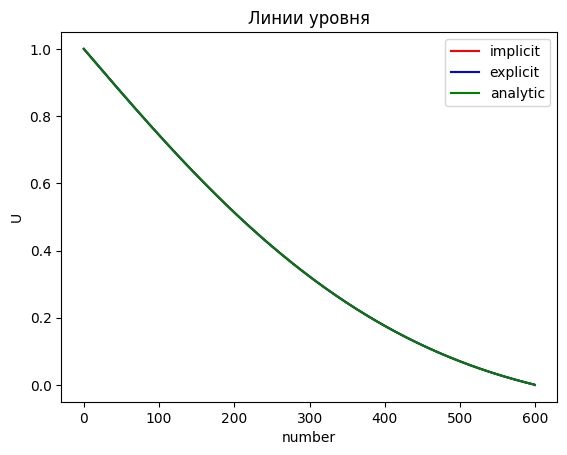

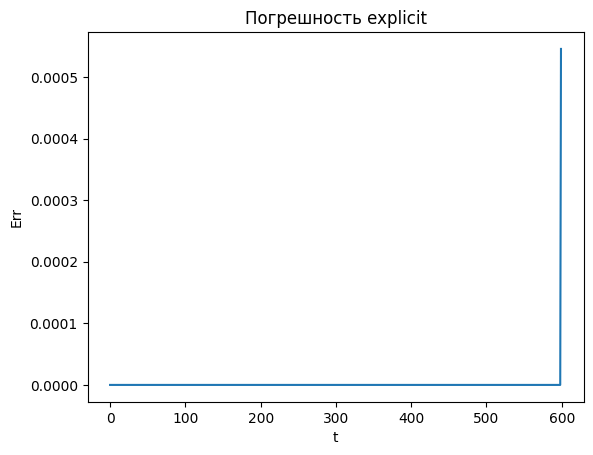

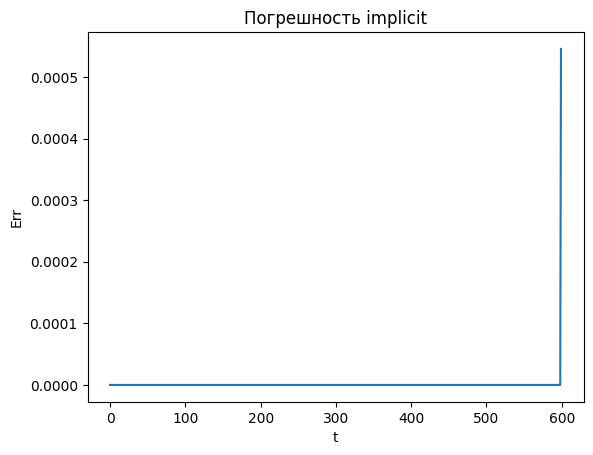

In [ ]:
data = {'N': 600, 'K': 100, 'T': 1}
N, K, T = int(data['N']), int(data['K']), int(data['T'])

args = {
    'a': 1,
    'b': 2,
    'c': -2,
    'd': 0,
    'l': np.pi / 2,
    'f': lambda: 0,
    'alpha': 1,
    'beta': 0,
    'gamma': 1,
    'delta': 0,
    'psi1': lambda x: np.exp(-x) * np.cos(x),
    'psi2': lambda x: 0,
    'psi1_dir1': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
    'psi1_dir2': lambda x: 2 * np.exp(-x) * np.sin(x),
    'phi0': lambda t: np.cos(2 * t),
    'phi1': lambda t: 0,
    'bound_type': 'a1p2',
    'approximation': 'p1',
    'solution': lambda x, t: np.exp(-x) * np.cos(x) * np.cos(2 * t),
}

solver = HyperbolicSolver(args, N, K, T)

ans = {
    'implicit': solver.implicit_solver(N, K, T),
    'explicit': solver.explicit_solver(N, K, T),
    'analytic': solver.analyticSolve(N, K, T)
}

presontation(ans)

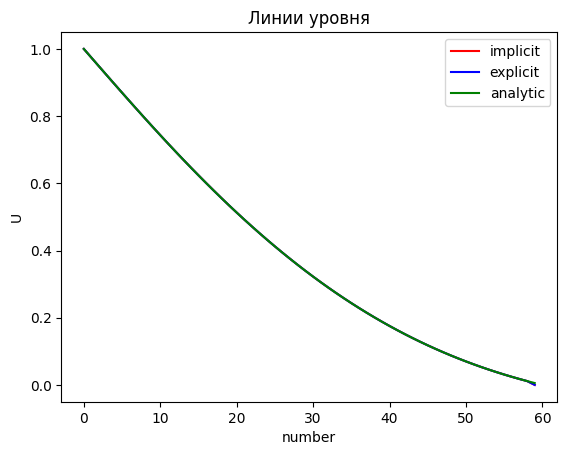

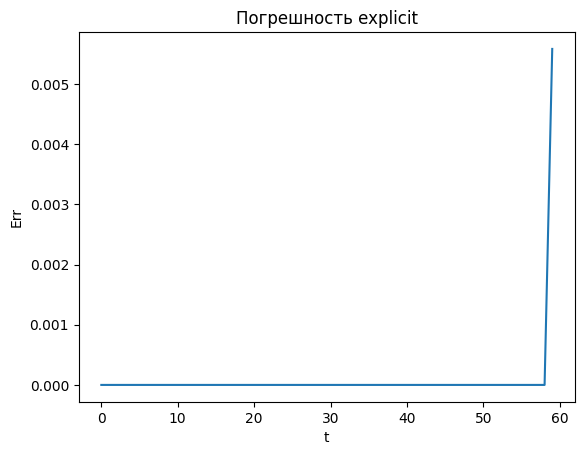

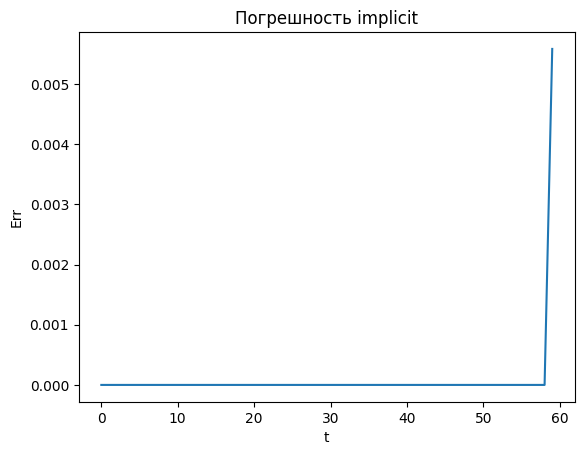

In [ ]:
data = {'N': 60, 'K': 10000, 'T': 1}
N, K, T = int(data['N']), int(data['K']), int(data['T'])

args = {
    'a': 1,
    'b': 2,
    'c': -2,
    'd': 0,
    'l': np.pi / 2,
    'f': lambda: 0,
    'alpha': 1,
    'beta': 0,
    'gamma': 1,
    'delta': 0,
    'psi1': lambda x: np.exp(-x) * np.cos(x),
    'psi2': lambda x: 0,
    'psi1_dir1': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
    'psi1_dir2': lambda x: 2 * np.exp(-x) * np.sin(x),
    'phi0': lambda t: np.cos(2 * t),
    'phi1': lambda t: 0,
    'bound_type': 'a1p2',
    'approximation': 'p1',
    'solution': lambda x, t: np.exp(-x) * np.cos(x) * np.cos(2 * t),
}

solver = HyperbolicSolver(args, N, K, T)

ans = {
    'implicit': solver.implicit_solver(N, K, T),
    'explicit': solver.explicit_solver(N, K, T),
    'analytic': solver.analyticSolve(N, K, T)
}

presontation(ans)

## Вывод:
При решение этого типа задач понял, что шаг h имеет больший вес при подсчёте погрешности, уменьшив его в сто раз, я уменьшил погрешность в 10 раз, а вот tau ощутимого эффекта не оказало на моё решение.

Схемы крест для решений уравнений гиперболичесого типа имеют высокую точность
и, при достаточной мелкости tau, способны достигать настолько маленькую погрешность, что ей можно будет пренебречь при решении реальных задач математической
физики.
